In [1]:
import pandas as pd
import sqlite3

# Connecting to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

In [2]:
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

# Creating dataframe from query.
Teams = conn.execute(query).fetchall()

In [3]:
# Convert results to DataFrame
teams_df = pd.DataFrame(Teams)

# Print out first 5 rows
teams_df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [4]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

# Print the first rows of `teams_df`
teams_df.head()

# Print the length of `teams_df`
#print(len(teams_df))

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [5]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis=1)

# Print out first rows of `df`
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


In [6]:
# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

## there must be a better way to do this

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [7]:
# Eliminating columns with null values
df = df.drop(['CS','HBP'], axis=1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
import sys
!{sys.executable} -m pip install --user matplotlib

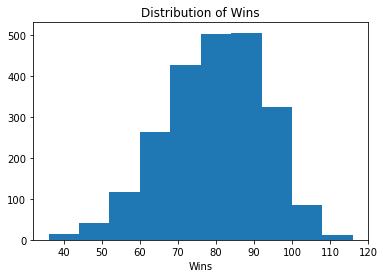

In [9]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [10]:
df['W'].mean()  # average wins per year

79.23043288150416

In [11]:
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

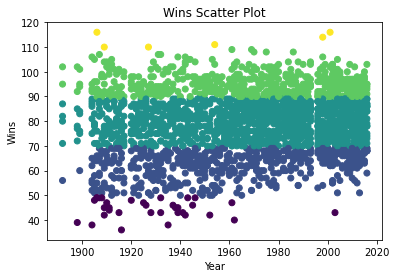

In [12]:
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [13]:
df = df[df['yearID'] > 1900]

In [14]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
#print(runs_per_year)
#print(games_per_year)

In [15]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
#print(mlb_runs_per_game)

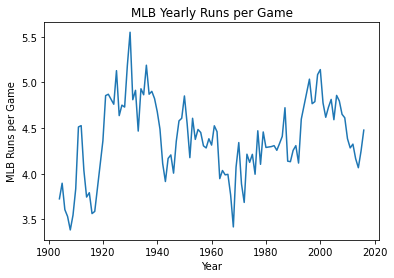

In [16]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [17]:
def assign_label(____):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,HA,HRA,BBA,SOA,E,DP,FP,win_bins,year_label,era_4
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,1391,180,713,973,192,154.0,0.969,3,4,1
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,1412,118,616,858,175,153.0,0.972,3,4,1
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,1317,120,578,889,163,155.0,0.974,3,4,1
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,1273,100,530,965,138,168.0,0.978,3,4,1
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,1259,91,563,847,123,149.0,0.981,3,4,1


In [18]:
# Create column for MLB runs per game from the mlb_runs_per_game dictionary
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)

In [19]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

In [20]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

In [21]:
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,...,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game
0,LAA,162,70,744,5424,1331,218,22,189,681,...,0,0,1,0,0,0,0,0,4.592593,4.839506
1,LAA,162,86,718,5499,1377,232,35,137,602,...,0,0,1,0,0,0,0,0,4.432099,4.358025
2,LAA,161,70,597,5506,1378,208,38,95,448,...,0,0,1,0,0,0,0,0,3.708075,4.099379
3,LAA,162,82,544,5362,1297,186,27,102,472,...,0,0,1,0,0,0,0,0,3.358025,3.401235
4,CAL,162,75,527,5354,1279,200,36,92,443,...,0,0,1,0,0,0,0,0,3.253086,3.512346


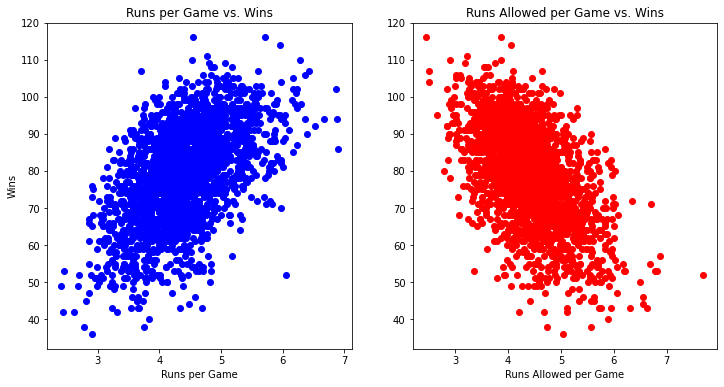

In [22]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

In [23]:
df.corr()['W']

G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
era_4               NaN
mlb_rpg        0.006909
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    0.028594
decade_1970    0.033679
decade_1980    0.043516
decade_1990    0.044150
decade_2000    0.052283
decade_2010    0.043453
R_per_game     0.528489
RA_per_game   -0.550696
Name: W, dtype: 

In [24]:
#attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']

data_attributes = df.drop(['W'], axis=1)

# Print the first rows of `df`
data_attributes.head()

,teamID,G,R,AB,H,2B,3B,HR,BB,SO,...,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game
0,LAA,162,744,5424,1331,218,22,189,681,1068.0,...,0,0,1,0,0,0,0,0,4.592593,4.839506
1,LAA,162,718,5499,1377,232,35,137,602,917.0,...,0,0,1,0,0,0,0,0,4.432099,4.358025
2,LAA,161,597,5506,1378,208,38,95,448,916.0,...,0,0,1,0,0,0,0,0,3.708075,4.099379
3,LAA,162,544,5362,1297,186,27,102,472,920.0,...,0,0,1,0,0,0,0,0,3.358025,3.401235
4,CAL,162,527,5354,1279,200,36,92,443,973.0,...,0,0,1,0,0,0,0,0,3.253086,3.512346


In [25]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

ValueError: could not convert string to float: 'WAS'